# Деформування балки з проміжною опорою

In [692]:
import matplotlib.pyplot as plt
from scipy.integrate import quad
import numpy as np

### Метод початкових параметрів

In [693]:
L = 50

A = np.zeros((16,16))
B = np.zeros((16))

# field equations 1
s = L
A[0][4], A[0][0], A[0][1], A[0][2], A[0][3], B[0] = 1, -1, -s, -(s**2)/2, -(s**3)/6, ((s-L/2)**3)/6
A[1][5], A[1][1], A[1][2], A[1][3], B[1] = 1, -1, -s, -(s**2)/2, ((s-L/2)**2)/2
A[2][6], A[2][2], A[2][3], B[2] = 1, -1, -s, (s-L/2)
A[3][7], A[3][3], B[3] = 1, -1, 1

# edge equations left
A[4][0] = 1
A[5][2] = 1

# transition equations 1-2
A[6][8], A[6][4] = 1, -1
A[7][9], A[7][5] = 1, -1
A[8][10], A[8][6] = 1, -1
A[9][4] = 1

# field equations 2
s = 2*L
A[10][12], A[10][8], A[10][9], A[10][10], A[10][11] = 1, -1, -(s-L), -((s-L)**2)/2, -((s-L)**3)/6
A[11][13], A[11][9], A[11][10], A[11][11] = 1, -1, -(s-L), -((s-L)**2)/2
A[12][14], A[12][10], A[12][11] = 1, -1, -(s-L)
A[13][15], A[13][11] = 1, -1

# edge equations right
A[14][12] = 1
A[15][14] = 1

In [694]:
A_inv = np.linalg.inv(A)
X = np.dot(A_inv,B)

In [695]:
S_tmm = np.arange(0,2*L+1,1)

W_tmm = []
for s in S_tmm:
    if s <= L/2:
        W_tmm.append(X[0] + X[1]*s + X[2]*(s**2)/2 + X[3]*(s**3)/6)
    if L/2 < s <= L:
        W_tmm.append(X[0] + X[1]*s + X[2]*(s**2)/2 + X[3]*(s**3)/6 + ((s-L/2)**3)/6)
    if s > L:
        W_tmm.append(X[8] + X[9]*(s-L) + X[10]*((s-L)**2)/2 + X[11]*((s-L)**3)/6)

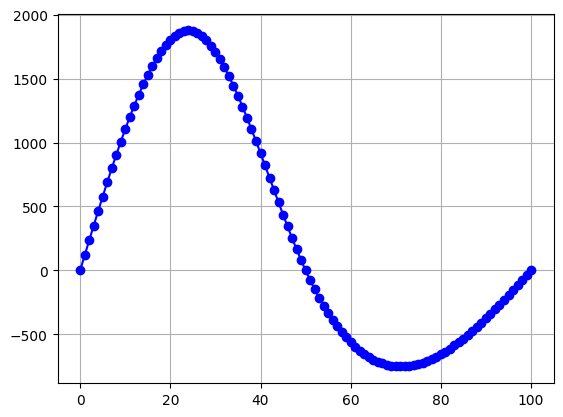

In [696]:
plt.plot(S_tmm,W_tmm,marker='o',color='blue')
plt.grid()
plt.show()

In [697]:
# print("x y")
# for i in range(len(S_tmm)):
#     print(S_tmm[i], W_tmm[i])

### Метод зважених залишків

1. Набір з $M=2$ несбалансованих базових функцій експоненціальної сім'ї:
\begin{align*}
    & \phi_1(s) = e^{-\frac{4s}{2L}} + A_{11}e^{-\frac{3s}{2L}} + A_{12}e^{-\frac{2s}{2L}} + A_{13}e^{-\frac{s}{2L}} + A_{14} \\
    & \phi_2(s) = e^{-\frac{3s}{2L}} + A_{21}e^{-\frac{2s}{2L}} + A_{22}e^{-\frac{s}{2L}} + A_{23} + A_{24}e^{\frac{s}{2L}}
\end{align*}

2. Набір з $M=5$ базових функцій експоненціальної сім'ї:
\begin{align*}
    & \phi_1(s) = e^{-\frac{4s}{2L}} + A_{11}e^{-\frac{3s}{2L}} + A_{12}e^{-\frac{2s}{2L}} + A_{13}e^{-\frac{s}{2L}} + A_{14} \\
    & \phi_2(s) = e^{-\frac{3s}{2L}} + A_{21}e^{-\frac{2s}{2L}} + A_{22}e^{-\frac{s}{2L}} + A_{23} + A_{24}e^{\frac{s}{2L}} \\
    & \phi_3(s) = e^{-\frac{2s}{2L}} + A_{21}e^{-\frac{s}{2L}} + A_{22} + A_{23}e^{\frac{s}{2L}} + A_{24}e^{\frac{2s}{2L}} \\
    & \phi_4(s) = e^{-\frac{s}{2L}} + A_{21} + A_{22}e^{\frac{s}{2L}} + A_{23}e^{\frac{2s}{2L}} + A_{24}e^{\frac{3s}{2L}} \\
    & \phi_5(s) = 1 + A_{21}e^{\frac{s}{2L}} + A_{22}e^{\frac{2s}{2L}} + A_{23}e^{\frac{3s}{2L}} + A_{24}e^{\frac{4s}{2L}}
\end{align*}

3. Набір з $M=2$ базових функцій експоненціальної сім'ї:
\begin{align*}
    & \phi_1(s) = e^{-\frac{2s}{2L}} + A_{11}e^{-\frac{s}{2L}} + A_{12} + A_{13}e^{\frac{s}{2L}} + A_{14}e^{\frac{2s}{2L}} \\
    & \phi_2(s) = e^{-\frac{5s}{2L}} + A_{21}e^{-\frac{3s}{2L}} + A_{22} + A_{23}e^{\frac{3s}{2L}} + A_{24}e^{\frac{5s}{2L}}
\end{align*}

In [698]:
trial_functions_set = 2

if trial_functions_set == 1:
    A1 = np.array([
        [1, 1, 1, 1], 
        [np.exp(-3), np.exp(-2), np.exp(-1), 1],
        [9, 4, 1, 0],
        [9*np.exp(-3), 4*np.exp(-2), np.exp(-1), 0],
    ])

    B1 = np.array([-1, -np.exp(-4), -16, -16*np.exp(-4)])

    A1_inv = np.linalg.inv(A1)
    a1, b1, c1, d1 = np.dot(A1_inv,B1)

    A2 = np.array([
        [1, 1, 1, 1], 
        [np.exp(-2), np.exp(-1), 1, np.exp(1)],
        [4, 1, 0, 1],
        [4*np.exp(-2), np.exp(-1), 0, np.exp(1)],
    ])

    B2 = np.array([-1, -np.exp(-3), -9, -9*np.exp(-3)])

    A2_inv = np.linalg.inv(A2)
    a2, b2, c2, d2 = np.dot(A2_inv,B2)

if trial_functions_set == 2:
    A1 = np.array([
        [1, 1, 1, 1], 
        [np.exp(-3), np.exp(-2), np.exp(-1), 1],
        [9, 4, 1, 0],
        [9*np.exp(-3), 4*np.exp(-2), np.exp(-1), 0],
    ])

    B1 = np.array([-1, -np.exp(-4), -16, -16*np.exp(-4)])

    A1_inv = np.linalg.inv(A1)
    a1, b1, c1, d1 = np.dot(A1_inv,B1)

    A2 = np.array([
        [1, 1, 1, 1], 
        [np.exp(-2), np.exp(-1), 1, np.exp(1)],
        [4, 1, 0, 1],
        [4*np.exp(-2), np.exp(-1), 0, np.exp(1)],
    ])

    B2 = np.array([-1, -np.exp(-3), -9, -9*np.exp(-3)])

    A2_inv = np.linalg.inv(A2)
    a2, b2, c2, d2 = np.dot(A2_inv,B2)

    A3 = np.array([
        [1, 1, 1, 1], 
        [np.exp(-1), 1, np.exp(1), np.exp(2)],
        [1, 0, 1, 4],
        [np.exp(-1), 0, np.exp(1), 4*np.exp(2)],
    ])

    B3 = np.array([-1, -np.exp(-2), -4, -4*np.exp(-2)])

    A3_inv = np.linalg.inv(A3)
    a3, b3, c3, d3 = np.dot(A3_inv,B3)

    A4 = np.array([
        [1, 1, 1, 1], 
        [1, np.exp(1), np.exp(2), np.exp(3)],
        [0, 1, 4, 9],
        [0, np.exp(1), 4*np.exp(2), 9*np.exp(3)],
    ])

    B4 = np.array([-1, -np.exp(-1), -1, -np.exp(-1)])

    A4_inv = np.linalg.inv(A4)
    a4, b4, c4, d4 = np.dot(A4_inv,B4)

    A5 = np.array([
        [1, 1, 1, 1], 
        [np.exp(1), np.exp(2), np.exp(3), np.exp(4)],
        [1, 4, 9, 16],
        [np.exp(1), 4*np.exp(2), 9*np.exp(3), 16*np.exp(4)],
    ])

    B5 = np.array([-1, -1, 0, 0])

    A5_inv = np.linalg.inv(A5)
    a5, b5, c5, d5 = np.dot(A5_inv,B5)

if trial_functions_set == 3:
    A1 = np.array([
        [1, 1, 1, 1], 
        [np.exp(-1), 1, np.exp(1), np.exp(2)],
        [1, 0, 1, 4],
        [np.exp(-1), 0, np.exp(1), 4*np.exp(2)],
    ])

    B1 = np.array([-1, -np.exp(-2), -4, -4*np.exp(-2)])

    A1_inv = np.linalg.inv(A1)
    a1, b1, c1, d1 = np.dot(A1_inv,B1)

    A2 = np.array([
        [1, 1, 1, 1], 
        [np.exp(-3), 1, np.exp(3), np.exp(5)],
        [9, 0, 9, 25],
        [9*np.exp(-3), 0, 9*np.exp(3), 25*np.exp(5)],
    ])

    B2 = np.array([-1, -np.exp(-5), -25, -25*np.exp(-5)])

    A2_inv = np.linalg.inv(A2)
    a2, b2, c2, d2 = np.dot(A2_inv,B2)

if trial_functions_set == 4:
    A1 = np.array([
        [1, 1, 1, 1], 
        [np.exp(-6), np.exp(-5), np.exp(-4), np.exp(-3)],
        [36, 25, 16, 9],
        [36*np.exp(-6), 25*np.exp(-5), 16*np.exp(-4), 9*np.exp(-3)],
    ])

    B1 = np.array([-1, -np.exp(-7), -49, -49*np.exp(-7)])

    A1_inv = np.linalg.inv(A1)
    a1, b1, c1, d1 = np.dot(A1_inv,B1)

    A2 = np.array([
        [1, 1, 1, 1], 
        [np.exp(-4), np.exp(-3), np.exp(-2), np.exp(-1)],
        [16, 9, 4, 1],
        [16*np.exp(-4), 9*np.exp(-3), 4*np.exp(-2), np.exp(-1)],
    ])

    B2 = np.array([-1, -np.exp(-5), -25, -25*np.exp(-5)])

    A2_inv = np.linalg.inv(A2)
    a2, b2, c2, d2 = np.dot(A2_inv,B2)

In [699]:
if trial_functions_set == 1:
    def phi_1(x):
        return np.exp(-(4*x)/(2*L)) + a1*np.exp(-(3*x)/(2*L)) + b1*np.exp(-(2*x)/(2*L)) + c1*np.exp(-x/(2*L)) + d1

    def d4_phi_1(x):
        return (256*np.exp(-(4*x)/(2*L)) + 81*a1*np.exp(-(3*x)/(2*L)) + 16*b1*np.exp(-(2*x)/(2*L)) + c1*np.exp(-x/(2*L))) / (16*L**4)

    def phi_2(x):
        return np.exp(-(3*x)/(2*L)) + a2*np.exp(-(2*x)/(2*L)) + b2*np.exp(-x/(2*L)) + c2 + d2*np.exp(x/(2*L))

    def d4_phi_2(x):
        return (81*np.exp(-(3*x)/(2*L)) + 16*a2*np.exp(-(2*x)/(2*L)) + b2*np.exp(-x/(2*L)) + d2*np.exp(x/(2*L))) / (16*L**4)

if trial_functions_set == 2:
    def phi_1(x):
        return np.exp(-(4*x)/(2*L)) + a1*np.exp(-(3*x)/(2*L)) + b1*np.exp(-(2*x)/(2*L)) + c1*np.exp(-x/(2*L)) + d1

    def d4_phi_1(x):
        return (256*np.exp(-(4*x)/(2*L)) + 81*a1*np.exp(-(3*x)/(2*L)) + 16*b1*np.exp(-(2*x)/(2*L)) + c1*np.exp(-x/(2*L))) / (16*L**4)

    def phi_2(x):
        return np.exp(-(3*x)/(2*L)) + a2*np.exp(-(2*x)/(2*L)) + b2*np.exp(-x/(2*L)) + c2 + d2*np.exp(x/(2*L))

    def d4_phi_2(x):
        return (81*np.exp(-(3*x)/(2*L)) + 16*a2*np.exp(-(2*x)/(2*L)) + b2*np.exp(-x/(2*L)) + d2*np.exp(x/(2*L))) / (16*L**4)
    
    def phi_3(x):
        return np.exp(-(2*x)/(2*L)) + a3*np.exp(-x/(2*L)) + b3 + c3*np.exp(x/(2*L)) + d3*np.exp((2*x)/(2*L))

    def d4_phi_3(x):
        return (16*np.exp(-(2*x)/(2*L)) + a3*np.exp(-x/(2*L)) + c3*np.exp(x/(2*L)) + 16*d3*np.exp((2*x)/(2*L))) / (16*L**4)
    
    def phi_4(x):
        return np.exp(-x/(2*L)) + a4 + b4*np.exp(x/(2*L)) + c4*np.exp((2*x)/(2*L)) + d4*np.exp((3*x)/(2*L))

    def d4_phi_4(x):
        return (np.exp(-x/(2*L)) + b4*np.exp(x/(2*L)) + 16*c4*np.exp((2*x)/(2*L)) + 81*d4*np.exp((3*x)/(2*L))) / (16*L**4)
    
    def phi_5(x):
        return 1 + a5*np.exp(x/(2*L)) + b5*np.exp((2*x)/(2*L)) + c5*np.exp((3*x)/(2*L)) + d5*np.exp((4*x)/(2*L))

    def d4_phi_5(x):
        return (a5*np.exp(x/(2*L)) + 16*b5*np.exp((2*x)/(2*L)) + 81*c5*np.exp((3*x)/(2*L)) + 256*d5*np.exp((4*x)/(2*L))) / (16*L**4)

if trial_functions_set == 3:
    def phi_1(x):
        return np.exp(-(2*x)/(2*L)) + a1*np.exp(-x/(2*L)) + b1 + c1*np.exp(x/(2*L)) + d1*np.exp((2*x)/(2*L))

    def d4_phi_1(x):
        return (16*np.exp(-(2*x)/(2*L)) + a1*np.exp(-x/(2*L)) + c1*np.exp(x/(2*L)) + 16*d1*np.exp((2*x)/(2*L))) / (16*L**4)

    def phi_2(x):
        return np.exp(-(5*x)/(2*L)) + a2*np.exp(-(3*x)/(2*L)) + b2 + c2*np.exp((3*x)/(2*L)) + d2*np.exp((5*x)/(2*L))

    def d4_phi_2(x):
        return (625*np.exp(-(5*x)/(2*L)) + 81*a2*np.exp(-(3*x)/(2*L)) + 81*c2*np.exp((3*x)/(2*L)) + 625*d2*np.exp((5*x)/(2*L))) / (16*L**4)

In [700]:
if trial_functions_set in [1,3]:
    def integrand_11(x):
        return (d4_phi_1(x)) * (phi_1(x))

    def integrand_21(x):
        return (d4_phi_2(x)) * (phi_1(x))

    def integrand_12(x):
        return (d4_phi_1(x)) * (phi_2(x))

    def integrand_22(x):
        return (d4_phi_2(x)) * (phi_2(x))

if trial_functions_set == 2:
    def integrand_11(x):
        return (d4_phi_1(x)) * (phi_1(x))

    def integrand_21(x):
        return (d4_phi_2(x)) * (phi_1(x))

    def integrand_31(x):
        return (d4_phi_3(x)) * (phi_1(x))

    def integrand_41(x):
        return (d4_phi_4(x)) * (phi_1(x))

    def integrand_51(x):
        return (d4_phi_5(x)) * (phi_1(x))

    def integrand_12(x):
        return (d4_phi_1(x)) * (phi_2(x))

    def integrand_22(x):
        return (d4_phi_2(x)) * (phi_2(x))
    
    def integrand_32(x):
        return (d4_phi_3(x)) * (phi_2(x))
    
    def integrand_42(x):
        return (d4_phi_4(x)) * (phi_2(x))

    def integrand_52(x):
        return (d4_phi_5(x)) * (phi_2(x))

    def integrand_13(x):
        return (d4_phi_1(x)) * (phi_3(x))

    def integrand_23(x):
        return (d4_phi_2(x)) * (phi_3(x))

    def integrand_33(x):
        return (d4_phi_3(x)) * (phi_3(x))

    def integrand_43(x):
        return (d4_phi_4(x)) * (phi_3(x))

    def integrand_53(x):
        return (d4_phi_5(x)) * (phi_3(x))

    def integrand_14(x):
        return (d4_phi_1(x)) * (phi_4(x))

    def integrand_24(x):
        return (d4_phi_2(x)) * (phi_4(x))

    def integrand_34(x):
        return (d4_phi_3(x)) * (phi_4(x))

    def integrand_44(x):
        return (d4_phi_4(x)) * (phi_4(x))

    def integrand_54(x):
        return (d4_phi_5(x)) * (phi_4(x))

    def integrand_15(x):
        return (d4_phi_1(x)) * (phi_5(x))

    def integrand_25(x):
        return (d4_phi_2(x)) * (phi_5(x))

    def integrand_35(x):
        return (d4_phi_3(x)) * (phi_5(x))

    def integrand_45(x):
        return (d4_phi_4(x)) * (phi_5(x))

    def integrand_55(x):
        return (d4_phi_5(x)) * (phi_5(x))

In [701]:
if trial_functions_set in [1,3]:
    I11 = quad(integrand_11, 0, 2*L)[0]
    I21 = quad(integrand_21, 0, 2*L)[0]
    I12 = quad(integrand_12, 0, 2*L)[0]
    I22 = quad(integrand_22, 0, 2*L)[0]

    U = np.array([
        [I11, I21, -phi_1(L)], 
        [I12, I22, -phi_2(L)],
        [phi_1(L), phi_2(L), 0]
    ])

    V = np.array([phi_1(L/2), phi_2(L/2), 0])

    U_inv = np.linalg.inv(U)
    alpha1, alpha2, Z = np.dot(U_inv,V)

if trial_functions_set == 2:
    I11 = quad(integrand_11, 0, 2*L)[0]
    I21 = quad(integrand_21, 0, 2*L)[0]
    I31 = quad(integrand_31, 0, 2*L)[0]
    I41 = quad(integrand_41, 0, 2*L)[0]
    I51 = quad(integrand_51, 0, 2*L)[0]

    I12 = quad(integrand_12, 0, 2*L)[0]
    I22 = quad(integrand_22, 0, 2*L)[0]
    I32 = quad(integrand_32, 0, 2*L)[0]
    I42 = quad(integrand_42, 0, 2*L)[0]
    I52 = quad(integrand_52, 0, 2*L)[0]

    I13 = quad(integrand_13, 0, 2*L)[0]
    I23 = quad(integrand_23, 0, 2*L)[0]
    I33 = quad(integrand_33, 0, 2*L)[0]
    I43 = quad(integrand_43, 0, 2*L)[0]
    I53 = quad(integrand_53, 0, 2*L)[0]

    I14 = quad(integrand_14, 0, 2*L)[0]
    I24 = quad(integrand_24, 0, 2*L)[0]
    I34 = quad(integrand_34, 0, 2*L)[0]
    I44 = quad(integrand_44, 0, 2*L)[0]
    I54 = quad(integrand_54, 0, 2*L)[0]

    I15 = quad(integrand_15, 0, 2*L)[0]
    I25 = quad(integrand_25, 0, 2*L)[0]
    I35 = quad(integrand_35, 0, 2*L)[0]
    I45 = quad(integrand_45, 0, 2*L)[0]
    I55 = quad(integrand_55, 0, 2*L)[0]

    U = np.array([
        [I11, I21, I31, I41, I51, -phi_1(L)], 
        [I12, I22, I32, I42, I52, -phi_2(L)],
        [I13, I23, I33, I43, I53, -phi_3(L)],
        [I14, I24, I34, I44, I54, -phi_4(L)],
        [I15, I25, I35, I45, I55, -phi_5(L)],
        [phi_1(L), phi_2(L), phi_3(L), phi_4(L), phi_5(L), 0]
    ])

    V = np.array([phi_1(L/2), phi_2(L/2), phi_3(L/2), phi_4(L/2), phi_5(L/2), 0])

    U_inv = np.linalg.inv(U)
    alpha1, alpha2, alpha3, alpha4, alpha5, Z = np.dot(U_inv,V)

In [702]:
S_wrm = np.arange(0,2*L+1,1)

if trial_functions_set in [1,3]:
    W_wrm = np.array([alpha1*phi_1(s) + alpha2*phi_2(s) for s in S_wrm])

if trial_functions_set == 2:
    W_wrm = np.array([alpha1*phi_1(s) + alpha2*phi_2(s) + alpha3*phi_3(s) + alpha4*phi_4(s) + alpha5*phi_5(s) for s in S_wrm])

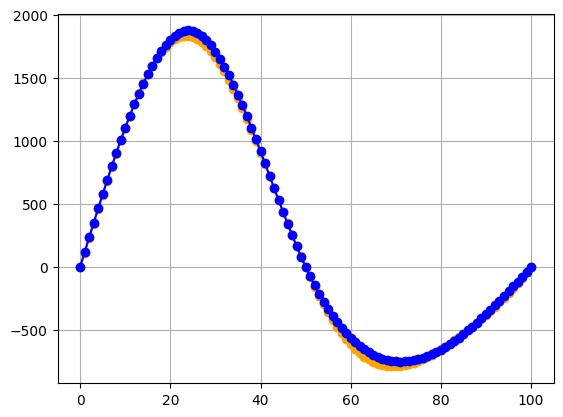

In [703]:
plt.plot(S_wrm,W_wrm,marker='o',color='orange')
plt.plot(S_tmm,W_tmm,marker='o',color='blue')
plt.grid()
plt.show()

In [704]:
error_abs = np.array([
    abs((W_wrm[i]-W_tmm[i])/W_tmm[i]) for i in range(len(S_wrm)) if abs((W_wrm[i]-W_tmm[i])/W_tmm[i]) < 1]
)

print(np.where(error_abs > 1)[0] if len(np.where(error_abs > 1)[0]) > 0 else "Zero deviations")
print("Max value:", max(W_wrm))

error = np.mean(error_abs)

print(f"Відносна похибка обчсилень: {round(error*100,4)}%")

Zero deviations
Max value: 1834.350555202458
Відносна похибка обчсилень: 3.1231%


In [705]:
# print("x y")
# for i in range(len(S_wrm)):
#     print(S_wrm[i], W_wrm[i])